# Algorithm for Continuum Background Estimation

In [1]:
# Imports:
import os
from cosipy.spacecraftfile import SpacecraftFile
from astropy.coordinates import SkyCoord
from cosipy.response import FullDetectorResponse
from mhealpy import HealpixMap, HealpixBase
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
import numpy.ma as ma
from cosipy import BinnedData

13:23:17 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=593634;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=29846;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=358714;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=268635;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

13:23:19 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=884037;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=81662;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

13:23:20 INFO      Starting 3ML!                                                                     ]8;id=669925;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=647929;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py#39\39]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=610640;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=316634;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=760133;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=995375;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py#41\41]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=562372;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=73513;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py#44\44]8;;\

         WARNING   no display variable set. using backend for graphics without display (agg)         ]8;id=590261;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=153619;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py#50\50]8;;\

13:23:23 WARNING   ROOT minimizer not available                                                ]8;id=852985;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=377999;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=344742;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=462169;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=109289;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=431184;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

13:23:23 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=799596;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=302457;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=702728;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=830907;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=883973;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=88773;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

13:23:28 WARNING   No fermitools installed                                              ]8;id=838708;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=715435;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

13:23:28 WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=161410;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=252741;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=529288;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=930388;file:///project/majello/astrohe/ckarwin/MyEnvironments/COSI/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

## Upload response and orientation:

In [2]:
data_path = "/project/majello/astrohe/ckarwin/COSI/COSIpy_Development/Continuum_BG_Estimation/Run_1/Data_Files"

# Orientatin file:
sc_orientation = SpacecraftFile.parse_from_file(os.path.join(data_path,"20280301_3_month.ori"))

# Detector response:
dr = os.path.join(data_path,\
        "SMEXv12.Continuum.HEALPixO3_10bins_log_flat.binnedimaging.imagingresponse.nonsparse_nside8.area.good_chunks_unzip.earthocc.h5")

## Define scatt map:

In [3]:
scatt_map = sc_orientation.get_scatt_map(nside = 16, coordsys = 'galactic')

Calculate PSR. We'll use the Crab for this example:

In [4]:
coord = SkyCoord.from_name('Crab').galactic

with FullDetectorResponse.open(dr) as response:
    psr = response.get_point_source_response(coord = coord, scatt_map = scatt_map)

Some basic properties of the PSR:

In [5]:
print("units: %s" %str(psr.unit)) 
print("labels: %s" %str(psr.axes.labels))
print("Em edges: %s" %str(psr.axes['Em'].edges))
print("Phi edges: %s" %str(psr.axes['Phi'].edges))
print("Number of Phi bins: %s" %str(len(psr.axes['Phi'].centers)))
print("PsiChi nside: %s" %str(psr.axes['PsiChi'].nside))

units: cm2 s
labels: ['Ei' 'Em' 'Phi' 'PsiChi']
Em edges: [  100.      158.489   251.189   398.107   630.957  1000.     1584.89
  2511.89   3981.07   6309.57  10000.   ] keV
Phi edges: [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180.] deg
Number of Phi bins: 36
PsiChi nside: 8


Plot psichi map:

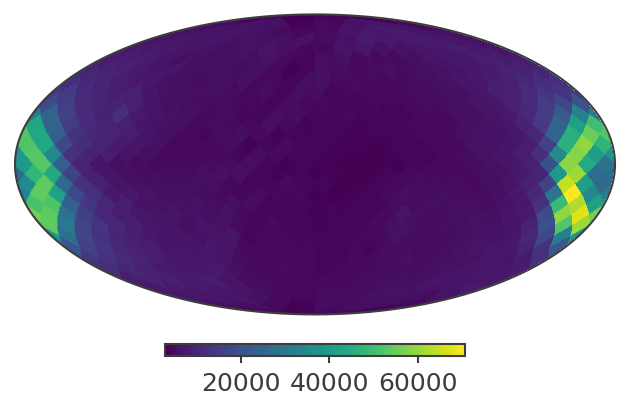

In [15]:
h = psr.slice[{'Em':2, 'Phi':4}].project('PsiChi')
m = HealpixMap(base = HealpixBase(npix = h.nbins), data = h.contents)
plot,ax = m.plot('mollview')
plt.show()

## Get mask from angular resolution (i.e. estimated ARM):

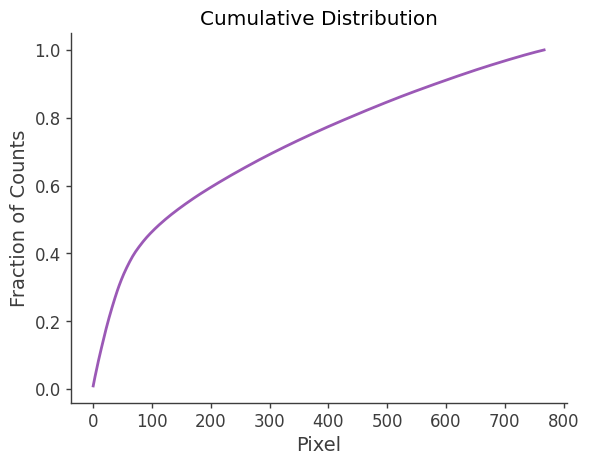

In [16]:
# Define map:
m_mask = HealpixMap(base = HealpixBase(npix = h.nbins), data = h.contents)

# Sort data in descending order:
sorted_data = np.sort(m_mask)[::-1]

# Calculte the cummulative distribution
cumdist = np.cumsum(sorted_data) / sum(sorted_data)

# Get indices of sorted array
sorted_indices = np.argsort(h.contents.value)[::-1]

# Define mask based on fraction of total exposure (i.e. counts):
arm_mask = cumdist >= 0.40

# Plot cummulative distribution
plt.plot(cumdist)
plt.title("Cumulative Distribution")
plt.xlabel("Pixel")
plt.ylabel("Fraction of Counts")
plt.show()

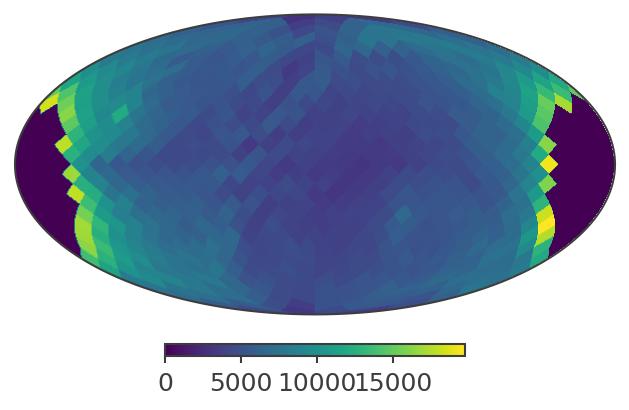

In [17]:
m_mask[sorted_indices[~arm_mask]] = 0
plot,ax = m_mask.plot('mollview')
plt.show()

## Simple inpainting algorithm:
Note: this algorithm is slightly modified in a lower cell to handle edge cases.

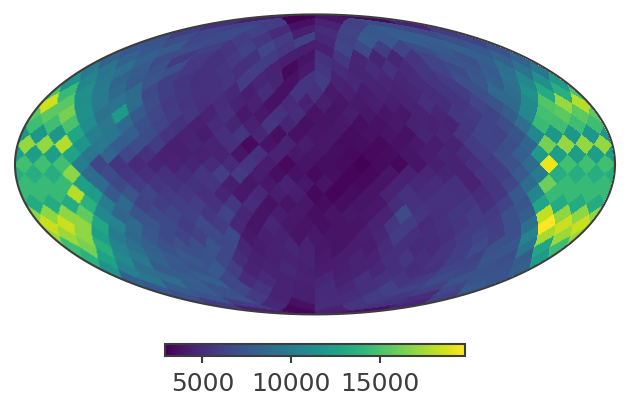

In [18]:
interp_list_low = []
interp_list_high = []
for i in range(0,len(sorted_indices[~arm_mask])):
    this_index = sorted_indices[~arm_mask][i]
    
    k = 1
    search_left = True
    while search_left == True:
        next_value = m_mask[this_index-k]
        if next_value == 0:
            k += 1
        if next_value != 0:
            interp_list_low.append(next_value)
            search_left = False

    j = 1
    search_right = True
    while search_right == True:
        next_value = m_mask[this_index+j]
        if next_value == 0:
            j += 1
        if next_value != 0:
            interp_list_high.append(next_value)
            search_right = False
            
interp_list_low = np.array(interp_list_low)
interp_list_high = np.array(interp_list_high)
interp_list = (interp_list_low + interp_list_high) / 2.0 

m_mask[sorted_indices[~arm_mask]] = interp_list

plot,ax = m_mask.plot('mollview')
plt.show()

## Load the simulated data (which includes Crab + full BG) for the BG estimate:

In [10]:
sim_data = BinnedData("inputs_crab.yaml")
sim_data.load_binned_data_from_hdf5("crab_bkg_binned_data_galactic.hdf5")

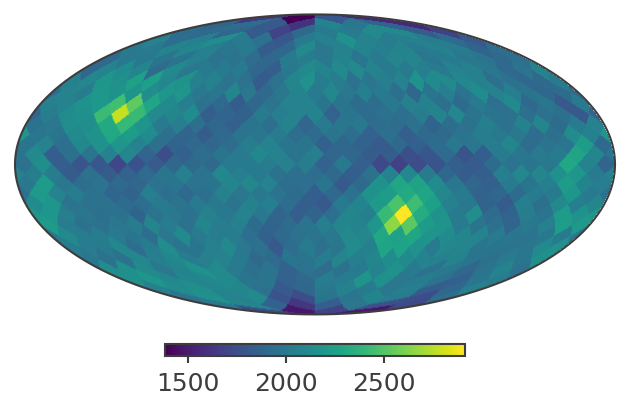

In [11]:
h_data = sim_data.binned_data.project('Em', 'Phi', 'PsiChi').slice[{'Em':4, 'Phi':4}].project('PsiChi')
m_data = HealpixMap(base = HealpixBase(npix = h_data.nbins), data = h_data.contents.todense())
plot,ax = m_data.plot('mollview')
plt.show()

Define template for estimated BG model:

In [12]:
estimated_bg = sim_data.binned_data.project('Em', 'Phi', 'PsiChi')

## Let's now bring everything together and iterate over all Phi bins and all energy bins:

In [19]:
show_plots = False

for E in range(0,len(psr.axes['Em'].centers)):
    for s in range(0,len(psr.axes['Phi'].centers)):
    
        print()
        print("Bin %s %s" %(str(E),str(s)))
        print()
    
        # Get PSR slice:
        h = psr.slice[{'Em':E, 'Phi':s}].project('PsiChi')
        m = HealpixMap(base = HealpixBase(npix = h.nbins), data = h.contents)
        
        # Define dummy map for plotting:
        m_mask = HealpixMap(base = HealpixBase(npix = h.nbins), data = h.contents)

        # Sort data in descending order:
        sorted_data = np.sort(m)[::-1]

        # Calculte the cummulative distribution
        cumdist = np.cumsum(sorted_data) / sum(sorted_data)

        # Get indices of sorted array
        sorted_indices = np.argsort(h.contents.value)[::-1]

        # Define mask based on fraction of total exposure (i.e. counts):
        arm_mask = cumdist >= 0.4
    
        # Plot cummulative distribution
        if show_plots == True:
            plt.plot(cumdist)
            plt.title("Cumulative Distribution")
            plt.xlabel("Pixel")
            plt.ylabel("Fraction of Counts")
            plt.show()
        
            # Plot true response
            plot,ax = m.plot('mollview') 
            plt.title("True Response")
            plt.show()
        
            # Plot masked response
            m_mask[sorted_indices[~arm_mask]] = 0
            plot,ax = m_mask.plot('mollview')
            plt.title("Masked Response")
            plt.show()
    
        # Make corresponding mask in data:
        h_data = sim_data.binned_data.project('Em', 'Phi', 'PsiChi').slice[{'Em':E, 'Phi':s}].project('PsiChi')
        m_data = HealpixMap(base = HealpixBase(npix = h_data.nbins), data = h_data.contents.todense())
        
        # Plot true data:
        if show_plots == True:
            plot,ax = m_data.plot('mollview')
            plt.title("True Data")
            plt.show()
        
        # Mask data:
        m_data[sorted_indices[~arm_mask]] = 0
        if show_plots == True:
            plot,ax = m_data.plot('mollview')
            plt.title("Masked Data")
            plt.show()
        
        # Skip this iteration if map is all zeros:
        if len(m_data[m_data[:] > 0]) == 0:
            print("All zeros and so skipping iteration!")
            continue
        
        # Get mean of masked data for edge cases (simple solution for now):
        masked_mean = np.mean(m_data)
            
        # Get interpolation values:
        interp_list_low = []
        interp_list_high = []
        for i in range(0,len(sorted_indices[~arm_mask])):
            
            this_index = sorted_indices[~arm_mask][i]
            
            # Search left:
            k = 1
            search_left = True
            while search_left == True:
                
                if this_index-k < 0:
                    print("Edge case!")
                    interp_list_low.append(masked_mean)
                    search_left = False
                    break
                    
                next_value = m_data[this_index-k]
                if next_value == 0:
                    k += 1
                if next_value != 0:
                    interp_list_low.append(next_value)
                    search_left = False
           
            # Search right:
            j = 1
            search_right = True
            while search_right == True:
               
                if this_index+j >= len(psr.axes['PsiChi'].centers)-1:
                    print("Edge case!")
                    interp_list_high.append(masked_mean)
                    search_right = False
                    break
                
                next_value = m_data[this_index+j]
                if next_value == 0:
                    j += 1
                if next_value != 0:
                    interp_list_high.append(next_value)
                    search_right = False
            
        interp_list_low = np.array(interp_list_low)
        interp_list_high = np.array(interp_list_high)
        interp_list = (interp_list_low + interp_list_high) / 2.0 

        # Update masked data with interpolated values:
        m_data[sorted_indices[~arm_mask]] = interp_list
        if show_plots == True:
            plot,ax = m_data.plot('mollview')
            plt.title("Interpolated Data (Estimated BG)")
            plt.show()
    
        # Update estimated BG:
        for p in range(len(sorted_indices[~arm_mask])):
            estimated_bg[E,s,sorted_indices[~arm_mask][p]] = interp_list[p]
        
# Write estimated BG file:
print("Writing file...")
estimated_bg.write("estimated_bg_simple_inpainting_interpolation.h5",overwrite=True)
print("Finished!")


Bin 0 0




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 0 1




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 0 2




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 0 3




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 0 4




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 0 5




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 0 6


Bin 0 7


Bin 0 8


Bin 0 9


Bin 0 10


Bin 0 11


Bin 0 12


Bin 0 13


Bin 0 14


Bin 0 15


Bin 0 16


Bin 0 17


Bin 0 18


Bin 0 19


Bin 0 20


Bin 0 21


Bin 0 22


Bin 0 23


Bin 0 24


Bin 0 25


Bin 0 26


Bin 0 27


Bin 0 28


Bin 0 29


Bin 0 30


Bin 0 31


Bin 0 32


Bin 0 33


Bin 0 34


Bin 0 35


Bin 1 0




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 1 1




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 1 2




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 1 3




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 1 4


Bin 1 5


Bin 1 6


Bin 1 7


Bin 1 8


Bin 1 9


Bin 1 10


Bin 1 11


Bin 1 12


Bin 1 13


Bin 1 14


Bin 1 15


Bin 1 16


Bin 1 17

Edge case!

Bin 1 18

Edge case!

Bin 1 19


Bin 1 20


Bin 1 21


Bin 1 22


Bin 1 23


Bin 1 24


Bin 1 25


Bin 1 26


Bin 1 27


Bin 1 28


Bin 1 29


Bin 1 30


Bin 1 31


Bin 1 32


Bin 1 33


Bin 1 34


Bin 1 35


Bin 2 0




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 2 1




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 2 2


Bin 2 3


Bin 2 4


Bin 2 5


Bin 2 6


Bin 2 7


Bin 2 8


Bin 2 9


Bin 2 10


Bin 2 11


Bin 2 12


Bin 2 13


Bin 2 14


Bin 2 15

Edge case!
Edge case!

Bin 2 16

Edge case!
Edge case!
Edge case!

Bin 2 17

Edge case!

Bin 2 18

Edge case!

Bin 2 19

Edge case!
Edge case!

Bin 2 20

Edge case!

Bin 2 21


Bin 2 22


Bin 2 23


Bin 2 24


Bin 2 25


Bin 2 26


Bin 2 27


Bin 2 28


Bin 2 29


Bin 2 30


Bin 2 31


Bin 2 32


Bin 2 33


Bin 2 34


Bin 2 35


Bin 3 0




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 3 1


Bin 3 2


Bin 3 3


Bin 3 4


Bin 3 5


Bin 3 6


Bin 3 7


Bin 3 8


Bin 3 9


Bin 3 10


Bin 3 11


Bin 3 12


Bin 3 13


Bin 3 14

Edge case!
Edge case!

Bin 3 15

Edge case!
Edge case!

Bin 3 16

Edge case!
Edge case!
Edge case!
Edge case!

Bin 3 17

Edge case!

Bin 3 18

Edge case!

Bin 3 19

Edge case!
Edge case!

Bin 3 20

Edge case!

Bin 3 21


Bin 3 22


Bin 3 23


Bin 3 24


Bin 3 25


Bin 3 26


Bin 3 27


Bin 3 28


Bin 3 29


Bin 3 30


Bin 3 31


Bin 3 32


Bin 3 33


Bin 3 34


Bin 3 35


Bin 4 0




WARNING RuntimeWarning: invalid value encountered in divide



All zeros and so skipping iteration!

Bin 4 1


Bin 4 2


Bin 4 3


Bin 4 4


Bin 4 5


Bin 4 6


Bin 4 7


Bin 4 8


Bin 4 9


Bin 4 10


Bin 4 11


Bin 4 12


Bin 4 13


Bin 4 14


Bin 4 15

Edge case!
Edge case!

Bin 4 16

Edge case!
Edge case!
Edge case!
Edge case!

Bin 4 17

Edge case!

Bin 4 18

Edge case!

Bin 4 19

Edge case!
Edge case!

Bin 4 20

Edge case!

Bin 4 21


Bin 4 22


Bin 4 23


Bin 4 24


Bin 4 25


Bin 4 26


Bin 4 27


Bin 4 28


Bin 4 29


Bin 4 30


Bin 4 31


Bin 4 32


Bin 4 33


Bin 4 34


Bin 4 35


Bin 5 0


Bin 5 1


Bin 5 2


Bin 5 3


Bin 5 4


Bin 5 5


Bin 5 6


Bin 5 7


Bin 5 8


Bin 5 9


Bin 5 10


Bin 5 11


Bin 5 12


Bin 5 13


Bin 5 14


Bin 5 15

Edge case!
Edge case!

Bin 5 16

Edge case!
Edge case!
Edge case!
Edge case!

Bin 5 17

Edge case!

Bin 5 18

Edge case!

Bin 5 19

Edge case!
Edge case!

Bin 5 20

Edge case!

Bin 5 21


Bin 5 22


Bin 5 23


Bin 5 24


Bin 5 25


Bin 5 26


Bin 5 27


Bin 5 28


Bin 5 29


Bin 5 30


Bin 5 31


Bi

## Load BGs and compare:

In [2]:
bg_true = BinnedData("inputs_crab.yaml")
bg_true.load_binned_data_from_hdf5("bkg_binned_data.hdf5")

bg_estimated = BinnedData("inputs_crab.yaml")
bg_estimated.load_binned_data_from_hdf5("estimated_bg_simple_inpainting_interpolation.h5")

Compare projection onto measured energy axis:

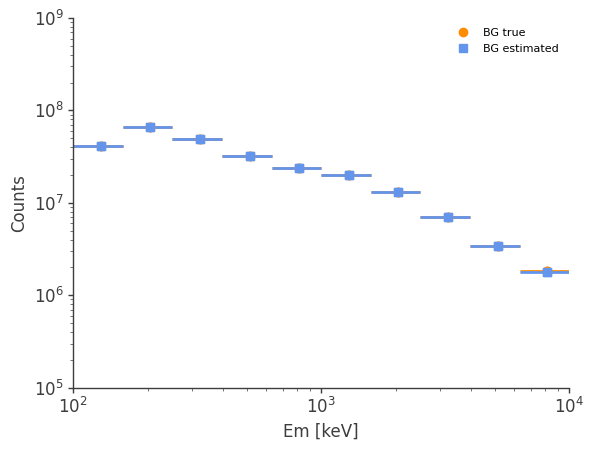

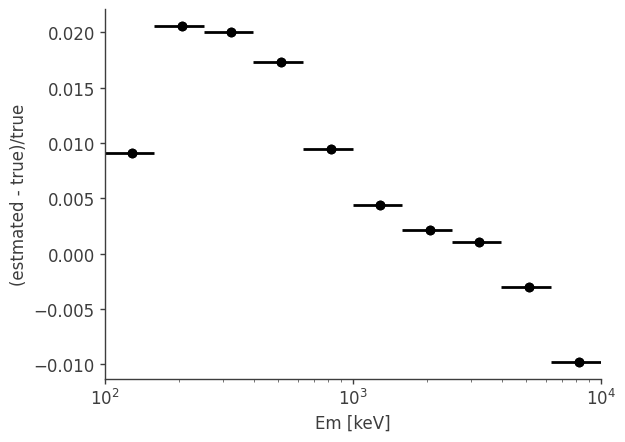

In [3]:
energy = bg_estimated.binned_data.axes['Em'].centers
energy_err = bg_estimated.binned_data.axes['Em'].widths / 2.0

true_plot = bg_true.binned_data.project('Em').contents.todense()
est_plot = bg_estimated.binned_data.project('Em').contents.todense()

plt.loglog(energy,true_plot,ls="",marker="o",color="darkorange",label="BG true")
plt.errorbar(energy,true_plot,xerr=energy_err,color="darkorange",ls="",marker="o",label="_nolabel_")

plt.loglog(energy,est_plot,ls="",marker="s",color="cornflowerblue",label="BG estimated")
plt.errorbar(energy,est_plot,xerr=energy_err,color="cornflowerblue",ls="",marker="s",label="_nolabel_")

plt.xlabel("Em [keV]", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xlim(1e2,1e4)
plt.ylim(1e5,1e9)
plt.legend(loc=1,frameon=False)
plt.show()

# Plot fractional difference:
diff = (est_plot - \
        true_plot) \
        / true_plot

plt.semilogx(energy,diff,ls="",marker="o",color="black")
plt.errorbar(energy,diff,xerr=energy_err,ls="",marker="o",color="black")

plt.xlabel("Em [keV]", fontsize=12)
plt.ylabel("(estmated - true)/true", fontsize=12)
plt.xlim(1e2,1e4)
plt.show()

Compare projection onto phi axis:

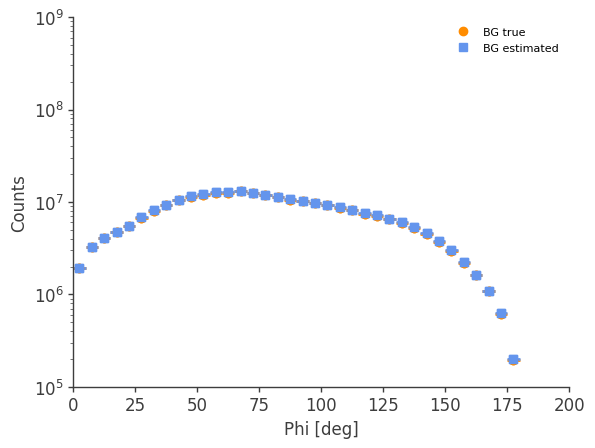

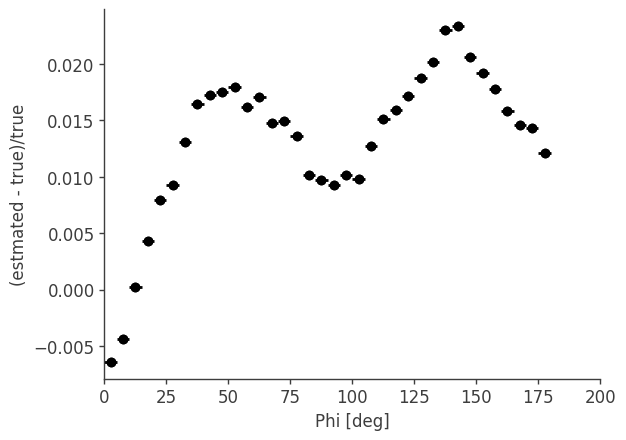

In [4]:
# Plot comparison:

phi = bg_estimated.binned_data.axes['Phi'].centers
phi_err = bg_estimated.binned_data.axes['Phi'].widths / 2.0

true_plot = bg_true.binned_data.project('Phi').contents.todense()
est_plot = bg_estimated.binned_data.project('Phi').contents.todense()

plt.semilogy(phi,true_plot,ls="",marker="o",color="darkorange",label="BG true")
plt.errorbar(phi,true_plot,xerr=phi_err,color="darkorange",ls="",marker="o",label="_nolabel_")

plt.semilogy(phi,est_plot,ls="",marker="s",color="cornflowerblue",label="BG estimated")
plt.errorbar(phi,est_plot,xerr=phi_err,color="cornflowerblue",ls="",marker="s",label="_nolabel_")

plt.xlabel("Phi [deg]", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xlim(0,200)
plt.ylim(1e5,1e9)
plt.legend(loc=1,frameon=False)
plt.show()

# Plot fractional difference:
diff = (est_plot - \
        true_plot) \
        / true_plot

plt.plot(phi,diff,ls="",marker="o",color="black")
plt.errorbar(phi,diff,xerr=phi_err,ls="",marker="o",color="black")

plt.xlabel("Phi [deg]", fontsize=12)
plt.ylabel("(estmated - true)/true", fontsize=12)
plt.xlim(0,200)
plt.show()

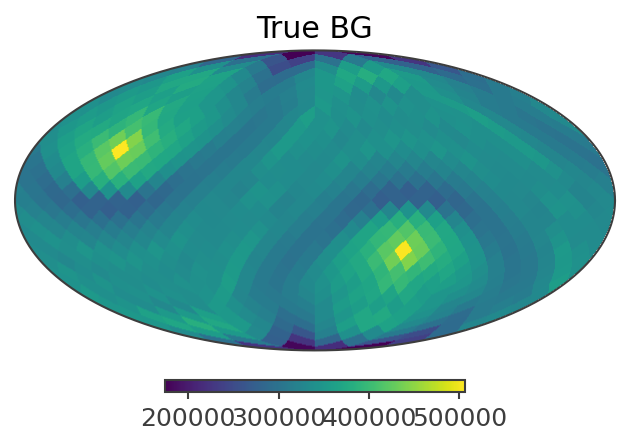

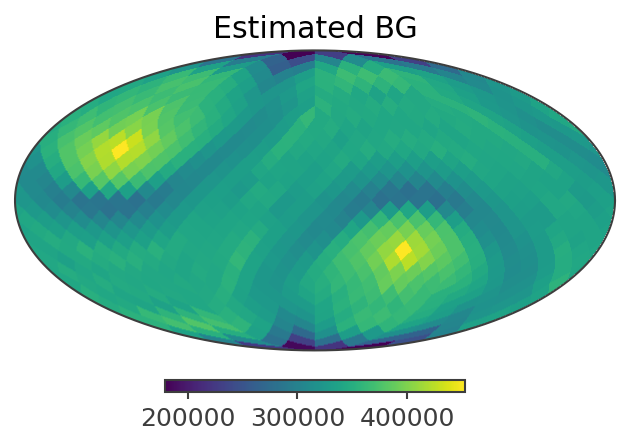


WARNING RuntimeWarning: invalid value encountered in divide


WARNING RuntimeWarning: divide by zero encountered in divide



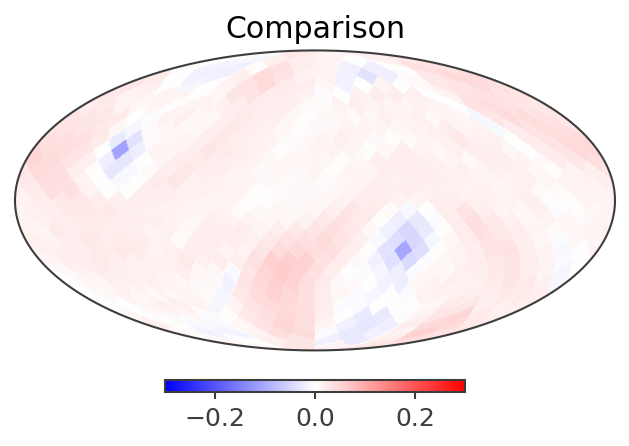

In [5]:
true_plot = bg_true.binned_data.project('Em', 'Phi', 'PsiChi').project('PsiChi')
true_plot_map = HealpixMap(base = HealpixBase(npix = true_plot.nbins), data = true_plot.contents.todense())
plot,ax = true_plot_map.plot('mollview')
plt.title("True BG")
plt.show()

est_plot = bg_estimated.binned_data.project('Em', 'Phi', 'PsiChi').project('PsiChi')
est_plot_map = HealpixMap(base = HealpixBase(npix = est_plot.nbins), data = est_plot.contents.todense())
plot,ax = est_plot_map.plot('mollview')
plt.title("Estimated BG")
plt.show()

diff = (est_plot - \
        true_plot) \
        / true_plot

diff_plot_map = HealpixMap(base = HealpixBase(npix = diff.nbins), data = diff.contents.todense())
plot,ax = diff_plot_map.plot('mollview', **{"cmap":"bwr","vmin":-0.3,"vmax":0.3})
plt.title("Comparison")
plt.show()